## Detección de objetos usando openCV
Aqui vamos a probar una función integrada en openCV que sirve para detectar objetos. En este ejercicio detectaremos caras y ojos.

Objetivos:
1. Detectar caras y ojos con la función CascadeClassifier de openCV.



### Obtener la imagen
Importamos las bibliotecas que vamos a utilizar.  
Leemos los modelos de clasificación para *rostros frontales* y para *ojos*. Estos modelos contienen valores numéricos que ya estan entrenados.
Obtenemos la imagen a la cual le detectaremos los rostros y los ojos.
Convertimos la imagen a grises ya que asi la requiere el clasificador.
Desplegamos la imagen original.

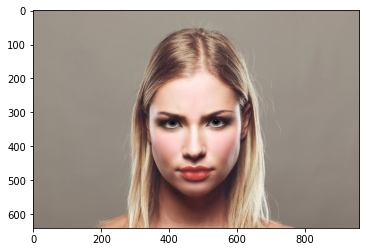

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

img = cv2.imread('./images/face1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgToShow =  img[:,:,::-1] 

plt.imshow(imgToShow)     
plt.show()


Usamos el modelo de clasificador *face_cascade* para detectar el rostro pasandole como parametro la imagen en grises.

Esta función nos regresa las coordenadas para formar rectangulos en donde se incluyan rostros.
Por cada rostro, se dibuja un rectangulo con la función cv2.rectangle, Esta función recibe la imagen, las coordenadas para el rectangulo y el color del rectangulo.

Por cada rostro detectado, se utiliza el modelo de clasificador *eye_cascade*. A este clasificador se le pasa como parametro la imagen en grises contenida dentro del rectangulo correspondiente al rostro detectado.
Esta función regresa coordenadas de los ojos detectados.
Posteriormente se dibujan rectangulos alrededor de cada ojo detectado.



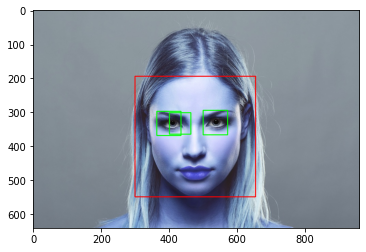

In [2]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#faces = face_cascade.detectMultiScale(gray, 1.01, 1)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img)     
plt.show()
#cv2.imshow('img',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

OpenCV incluye más modelos de clasificación para otros objetos. Puedes revisar algunos en esta liga:
https://github.com/opencv/opencv/tree/master/data/haarcascades